# Leveraging Sentiment Analysis for Enhanced Brand Management

## Problem Statement
---
Investment management and trading in the stock market can be challenging due to market volatility, economic conditions, and unpredictable events. Incorporating sentiment analysis from social media can provide valuable insights into public perception and sentiment towards specific stocks, enhancing traditional analysis methods.

In the rapidly evolving technology market, understanding customer sentiment towards products is crucial for companies like Google and Apple. However, manually analyzing customer sentiment is time-consuming and prone to bias. Given the vast amount of customer feedback available on platforms like Twitter, automating sentiment analysis using Machine Learning offers a scalable, efficient, and reliable solution.

The objective of this project is to develop and deploy Machine Learning models for sentiment analysis of customer feedback towards Google and Apple products. By analyzing large datasets from social media platforms, we aim to provide valuable insights to investment managers, traders, and technology companies to make informed decisions and enhance their understanding of customer sentiment.

## Business Understanding
---
Twitter is a platform where users often share their experiences and opinions about products. Analysing these sentiments can provide valuable feedback on what users like or dislike about a product, which can guide improvements and new features. Sentiment analysis can help understand how the brand is perceived in the market. Positive sentiment is usually associated with a strong brand image, while negative sentiment can indicate potential issues that need to be addressed.  

Investment management and trading require comprehensive analysis to make informed decisions. While financial metrics and technical analysis play a significant role, understanding public sentiment towards a particular stock can provide a unique perspective. Positive public perception often translates into increased investor confidence, higher demand for the stock, and potentially better performance in the market.

### How Positive Public Perception Improves Stock Performance:

1. **Increased Investor Confidence**: Positive sentiment towards a stock can boost investor confidence, leading to increased buying activity. Investors are more likely to invest in companies with positive public perception, contributing to higher demand for the stock.

2. **Enhanced Brand Reputation**: Positive sentiment reflects well on a company's brand reputation. A strong brand image can attract investors and customers alike, leading to long-term growth and stability.

3. **Favorable Market Conditions**: Stocks with positive sentiment tend to perform well in favorable market conditions. Positive news or sentiment can drive up the stock price, resulting in better returns for investors.

4. **Reduced Risk of Negative Events**: Companies with positive public perception are less susceptible to negative events impacting their stock price. Positive sentiment acts as a buffer against adverse news or market downturns, helping to mitigate potential losses.

### Key Objectives
$i.$ Utilize Natural Language Processing techniques to construct a machine learning model for automated sentiment analysis of tweets related to Google and Apple products.<br>
$ii.$ **Utilize Social Sentiment Analysis**: Collect and analyze sentiment data from Twitter regarding two stock options - Apple and Google<br>

$iii.$ **Gain Alternative Insights**: Augment traditional financial analysis with sentiment analysis to identify potential investment opportunities or risks that may not be captured by conventional methods.<br>

$iv.$ **Improve Investment Decision-making**: Use sentiment analysis to inform investment decisions, providing a different angle on which stocks to invest in based on their social sentiment.

## Data Understanding
---
The dataset, sourced from CrowdFlower via [data.world](https://data.world/crowdflower/brands-and-product-emotions), comprises over 9,000 tweets with sentiment ratings labeled as positive, negative, or neutral by human raters.

The tweets were posted during the South by Southwest conference, primarily discussing Google and Apple products. The crowd was asked if the tweet expressed positive, negative, or no emotion towards a brand and/or product. If some emotion was expressed, they were also asked to specify which brand or product was the target of that emotion. The data was compiled in 2013 by Kent Cavender-Bares.

Tweets, being succinct and emotionally charged, serve as effective indicators of consumer sentiment. South by Southwest serves as a platform for showcasing the latest technology, enabling consumers to compare products from major tech companies directly and potentially mitigating biases to some extent.

The target variable was engineered into two classes: tweets with positive sentiment and tweets without positive sentiment, encompassing neutral, negative, and indistinguishable sentiments. The focus is solely on whether the tweet is positive, as positive emotion drives sales, which can be translated into return on investment.

## Exploratory Data Analysis
---

In [98]:
#importing the needed libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#nlp
import nltk
from nltk.corpus import stopwords,wordnet
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer,TweetTokenizer
from nltk.stem import WordNetLemmatizer
from string import punctuation
from wordcloud import WordCloud, STOPWORDS
#modeling
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score, roc_auc_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV 
from tensorflow import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

In [136]:
#importing the data
data = pd.read_csv('dataset.csv', encoding= 'unicode_escape')

data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [137]:
#changing the column names for easier readability
data.columns = ['tweet_text', 'product', 'sentiment']

In [138]:
#Viewing the first few rows
data.head()

,tweet_text,product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  9092 non-null   object
 1   product     3291 non-null   object
 2   sentiment   9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


### Data Cleaning
---

In [140]:
#Checking for null values
data.isna().sum()

tweet_text       1
product       5802
sentiment        0
dtype: int64

In [141]:
#we drop the one raw of tweet that has missing text

data.dropna(subset=['tweet_text'], inplace=True)


In [142]:
#sampling out records of products with null values to visually inspect
data.loc[data['sentiment'] == 'No emotion toward brand or product'].sample(10)

,tweet_text,product,sentiment
3344,Possible Google social network to preview at #...,NaN,No emotion toward brand or product
3671,Want to win a ticket (1) to the #SXSW party? R...,NaN,No emotion toward brand or product
6857,RT @mention W/ the core week of data still to ...,NaN,No emotion toward brand or product
2842,"Finally fed up with #AngryBirds, Julian scream...",NaN,No emotion toward brand or product
9034,"Marisa Meyer is showing yelp, aka google hotpo...",NaN,No emotion toward brand or product
5391,RT @mention Android may be gaining market shar...,NaN,No emotion toward brand or product
5769,RT @mention Get #SXSW film red carpet coverage...,NaN,No emotion toward brand or product
2718,Does apple stay in downtown Austin? I think ye...,NaN,No emotion toward brand or product
5745,"RT @mention Free #sxsw Lemonade Stand. iPhone,...",NaN,No emotion toward brand or product
7242,Checking out Q&amp;A With Google &amp; Bing On...,NaN,No emotion toward brand or product


In the `product` column, it is observed that almost 60% of the data is missing. Further inspection reveals that most of these rows are those in which users had no emotion toward the Google or Apple products.

The loss of such a substantial amount of data cannot be afforded. Therefore, for these records, a new product category called `undefined` will be created for the analysis of this project.

In [143]:
#replacing null value with undefined
data['product'].fillna('undefined', inplace = True)

In [144]:
#sanity check
data.isna().sum()

tweet_text    0
product       0
sentiment     0
dtype: int64

In [145]:
#viewing distribution of products

data['product'].value_counts()

product
undefined                          5801
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: count, dtype: int64

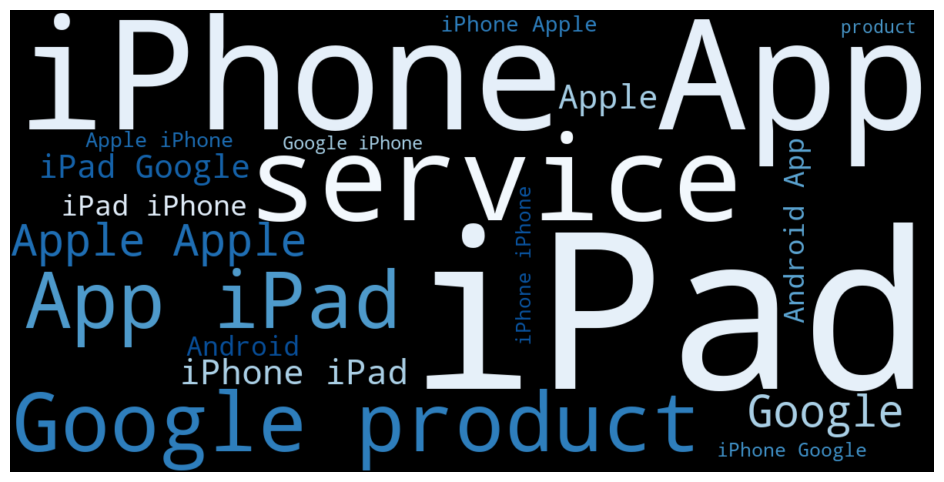

In [146]:
# Combine all products texts into one large text
all_products = ' '.join(product for product in data['product'] if product != 'undefined')

# Generate a word cloud image
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black',
                       width=1200, height=600, max_words=150, random_state=42, colormap='Blues').generate(all_products)

# Display the generated image
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=1, y=1)
plt.show()

The spread within products is highly imbalanced, with over half of the tweets not mentioning a specific product. To address this, another column called "Brand" will be added, indicating the brand the tweet is about based on the information from the "Product" column.  

First, all entries in the "Product" column will be double-checked. Then, a function will be created to loop through the product column and assign the appropriate brand to the new column. If the brand is undefined, the function will iterate through the text of the tweet to identify any mentions of product words. If none are found, the brand will remain undefined. If words for both brands are mentioned, the brand will be designated as "Both". This approach aims to create more balanced classes within this new feature.

In [147]:
#creating a function to identify the brand

def find_brand(Product, Tweet): 
    #Labeling brand as Undetermined by default
    brand = 'Undefined' 

    #Labeling Google based on product column
    if ((Product.lower().__contains__('google')) or (Product.lower().__contains__('android'))): 
        brand = 'Google' 

    #Labeling Apple based on product column

    elif ((Product.lower().__contains__('apple')) or (Product.lower().__contains__('ip'))): 
        brand = 'Apple' 
    
    if (brand == 'Undefined'): 
        #Making tweet lowercase
        lower_tweet = Tweet.lower() 

        #labeling google if there is mention of google or android on tweet
        is_google = (lower_tweet.__contains__('google')) or (lower_tweet.__contains__('android')) 

        #labeling apple based on tweet
        is_apple = (lower_tweet.__contains__('apple')) or (lower_tweet.__contains__('ip')) 
        
        #if it has both identifiers in the tweet
        if (is_google and is_apple): 
            brand = 'Both' 
        elif (is_google):
            brand = 'Google' 
        elif (is_apple):
            brand = 'Apple' 
    
    return brand

#Applying function to product and tweet_text columb

data['brand'] = data.apply(lambda x: find_brand(x['product'], x['tweet_text']), axis = 1) 
data['brand'].value_counts(normalize= True) 

brand
Apple        0.590189
Google       0.304883
Undefined    0.081500
Both         0.023427
Name: proportion, dtype: float64

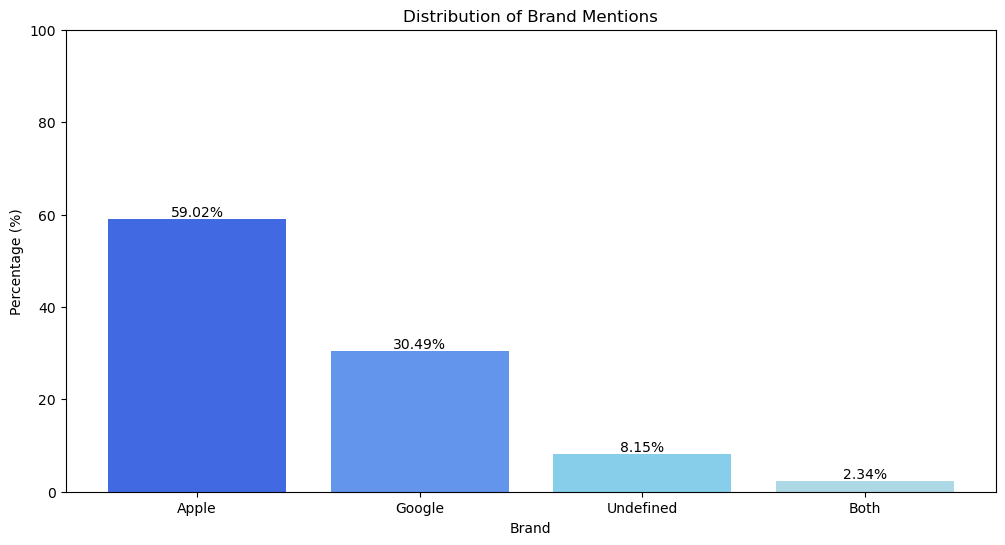

In [148]:
#Visually inspecting the brand distribution

brand_distribution = data['brand'].value_counts(normalize=True).to_dict()

brands = list(brand_distribution.keys())
percentages = [value * 100 for value in brand_distribution.values()] 

# Creating the bar plot
plt.figure(figsize=(12, 6))
plt.bar(brands, percentages, color = ['RoyalBlue', 'CornflowerBlue', 'SkyBlue', 'LightBlue']
)

plt.xlabel('Brand')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Brand Mentions')
plt.ylim(0, 100)

# Adding percentage data labels above each bar
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha = 'center')

plt.show()

The distribution has undergone a notable shift. Although class imbalances persist, they manifest differently this time. Over half of the tweets pertain to the brand Apple, while approximately a third relate to the brand Google. Tweets with undetermined brands constitute about eight percent of all tweets, with those mentioning both brands accounting for only around two percent. While this represents an improvement over the previous scenario where over half of the tweets were classified as unknown (referring to undetermined product tweets), the current imbalances remain suboptimal.

In [30]:
#inspecting the distiribution of sentiments
data['sentiment'].value_counts()

sentiment
No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

Significant imbalance is observed among these classes, with over half of the tweets categorized as having no emotion, followed by approximately a third rated as positive. Less than 600 tweets were classified as negative, and fewer than 200 were labeled as `I can't tell`, indicating uncertainty in sentiment determination. Overall, just over a third of the tweets were assigned positive or negative sentiment.

For the analysis in this project, a model is desired that predicts if the sentiment is positive or not. Therefore, the sentiment is engineered such that `positive emotion` is represented by 1 while the remaining classes are represented by 0.

In [31]:
#Turning our Target into a Binary number
dict_sentiment = {'No emotion toward brand or product':0, 
             'Positive emotion':1,
             'Negative emotion':0,
             "I can't tell": 0}
data['sentiment'] = data['sentiment'].map(dict_sentiment)

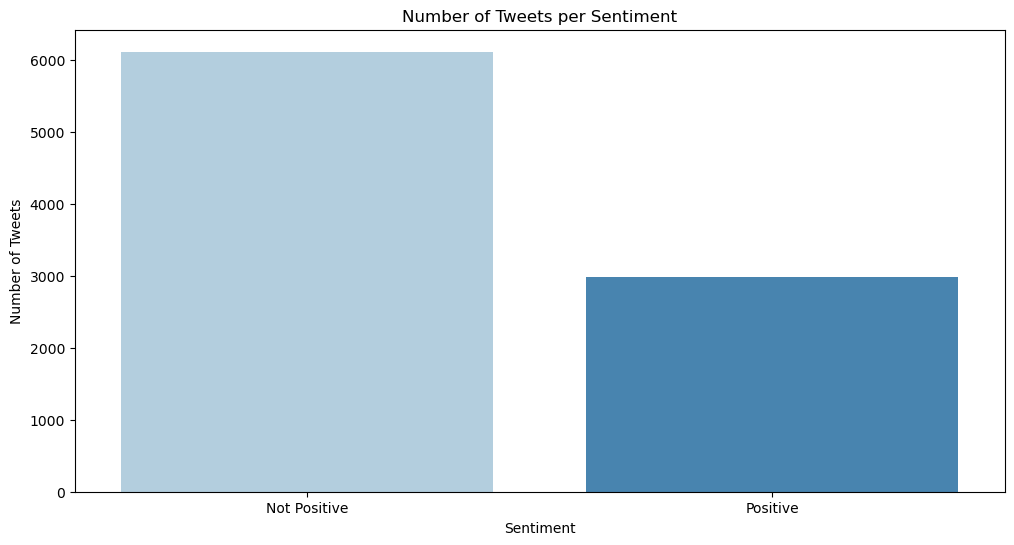

In [38]:
#Visualizing new Sentiment split
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data = data, x = "sentiment", order = data["sentiment"].value_counts().index, palette = 'Blues')
ax.set_xticklabels(labels = ["Not Positive", "Positive"])
ax.set_xlabel(xlabel = "Sentiment")
ax.tick_params(axis='y', which='major')
ax.set_ylabel(ylabel = "Number of Tweets")
ax.set_title(f"Number of Tweets per Sentiment");

## Preprocessing

In [39]:
#previewing the  data
data.head()

,tweet_text,product,sentiment,brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,1,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,1,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,1,Google


In [40]:
#previwing random tweets
data['tweet_text'].loc[1133]

'Check out the @mention Route {link} ; RSVP here -&gt; https://www.facebook.com/event.php?eid=141164002609303 #sxswi #sxsw'

**Cleaning the Tweets**

The following steps are taken to clean the tweets:

1. **Removal of Placeholders**: 
   - "{link}" and '[video]' are removed because they serve as placeholders for external links and do not provide valuable information.

2. **Elimination of Twitter Handles**: 
   - Twitter handles are removed as they do not convey significant information.

3. **Stopword Removal**: 
   - Stopwords, which are common words that do not add much meaning to the text, are eliminated.

4. **Punctuation Removal**: 
   - Punctuation marks are removed to ensure consistency and simplify further processing.

5. **Exclusion of "SXSW" Mentions**: 
   - All instances of "SXSW" are removed from the tweets since they are present in a large number of tweets collected during the South by Southwest conference and do not contribute meaningful content.

6. **Websites and HTML Formatting Removal**: 
   - Websites and HTML formatting are removed to extract only the textual content.

After these cleaning steps, the following transformations are applied:

- **Lowercasing**: 
  - Every word in the corpus is converted to lowercase to standardize the text.

- **Tokenization**: 
  - The text is tokenized to split it into individual words or tokens.

- **Lemmatization**: 
 

In [41]:
#downloading stopwords
nltk.download('stopwords', quiet= True)
stopword_list = stopwords.words('english')

nltk.download('wordnet', quiet= True)

#instantiate regextokenize and defining a pattern to remove words less that 3 characters
tokenizer = RegexpTokenizer(r"(?u)\w{3,}")

#add 'SXSW' to the stopwordlist
stopword_list.append('sxsw')

#add link the stopword_list
stopword_list.append('link')

#add punctuations to stopwords
stopword_list += punctuation

#instantiating lemmatizer
lemma = WordNetLemmatizer()

#Instantiating tweet tokenizer

tweet_tokenize = TweetTokenizer(strip_handles= True)

In [50]:
# Create a function to clean the text
def clean_tweet(text):
    #TweetTokenizer also puts each punctuation as it's own token
    no_handle = tweet_tokenize.tokenize(text)
    #Join the list of non-handle tokens back together
    text = " ".join(no_handle) 

    # Remove the punctuation
    text = re.sub(r'[^\w\s]',"",text)

    # Remove the @ mentions
    text = re.sub(r'@[A-Za-z0-9]+', '', text)

    # Remove 
    text = re.sub(r'&[a-z]+;', '', text)

    # Remove keyword link
    text = re.sub(r"\blink\b", " ", text)

    # Remove keyword video
    text = re.sub(r"\bvideo\b", " ", text)

    # Remove www. and .com
    text = re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", " ", text)

    # Remove keyword "sxsx"
    text = re.sub(r"\bsxsw\b", " ", text)

    # Remove keyword "SXSW"
    text = re.sub(r"\bSXSW\b", " ", text)

    # Remove keyword sxtx
    text = re.sub(r"\sxtx\b", " ", text)

    # Remove the # symbol
    text = re.sub(r'#','', text)

    # Removing RT
    text = re.sub(r'RT[\s]+', '', text)

    # Removing hyperlink
    text = re.sub(r'https?:\/\/\S+', '', text)

    # Remove Special Characters
    text = re.sub(r"[^\x00-\x7F]+\ *(?:[^\x00-\x7F]|)*", " ", text)

    # Remove curly brackets
    text = re.sub(r'{.+?}', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove leftover numbers 
    text = re.sub(r'\d+', '', text)

    #Turn all the tokens lowercase
    lower_tweet = text.lower()

    #Only include words with 3 or more characters
    token_list = tokenizer.tokenize(lower_tweet)

    #Remove stopwords
    stopwords_removed = [token for token in token_list if token not in stopword_list]

    #Lemmatize the remaining word tokens
    lemma_tokens = [lemma.lemmatize(token) for token in stopwords_removed]

    return lemma_tokens

In [43]:
#sample tweet before cleaning
data['tweet_text'].iloc[100]

'Headline: &quot;#iPad 2 is the Must-Have Gadget at #SXSW&quot; Hmm... I could have seen that one coming! {link} #gadget'

In [51]:
#sanity check for the cleaninig function
clean_tweet(data['tweet_text'].iloc[100])

['headline',
 'ipad',
 'musthave',
 'gadget',
 'hmm',
 'could',
 'seen',
 'one',
 'coming',
 'gadget']

In [53]:
#applying the function to the dataset
data['clean_tweet_token'] = data['tweet_text'].apply(clean_tweet)

data.head()

,tweet_text,product,sentiment,brand,clean_tweet_token
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0,Apple,"[iphone, hr, tweeting, rise_austin, dead, need..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,1,Apple,"[know, awesome, ipad, iphone, app, youll, like..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,1,Apple,"[wait, ipad, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0,Apple,"[hope, year, festival, isnt, crashy, year, iph..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,1,Google,"[great, stuff, fri, marissa, mayer, google, ti..."


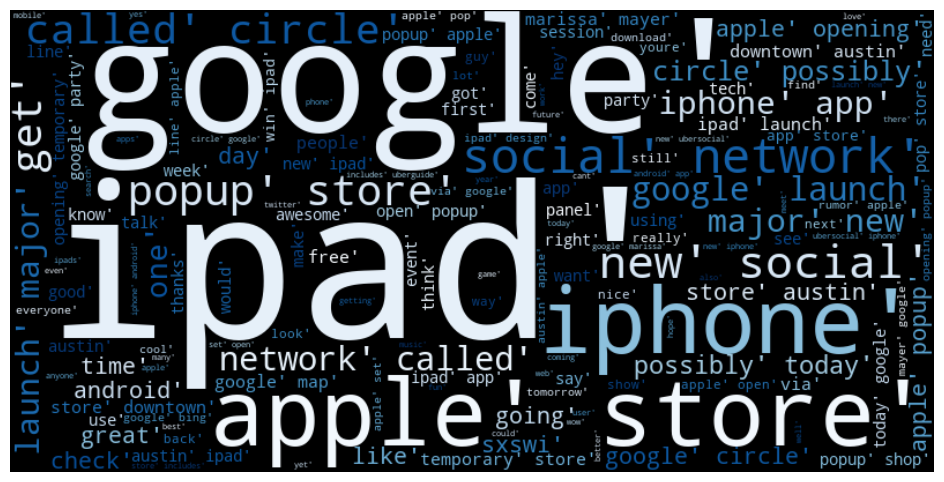

In [54]:
#plotting the frequency of words on the cleaned tokens
# Combine all tokenized clean tweet words into one large text
all_tweets = ' '.join(data['clean_tweet_token'].astype(str))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black',
                       width=800, height=400, max_words=150, random_state=42, colormap = 'Blues').generate(all_tweets)

# Display the generated image
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=1, y=1)
plt.show()

## Modelling
---

In [55]:
#data check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9092 entries, 0 to 9092
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_text         9092 non-null   object
 1   product            9092 non-null   object
 2   sentiment          9092 non-null   int64 
 3   brand              9092 non-null   object
 4   clean_tweet_token  9092 non-null   object
dtypes: int64(1), object(4)
memory usage: 684.2+ KB


A new DataFrame will be created containing only the cleaned tokens column and emotions column. 

Before modeling the data, a train-test split will be performed to divide the data into training and test sets, thereby avoiding data leakage.

In [56]:
#subseting the columns for modeling

df = data[['clean_tweet_token', 'sentiment']]

#converting the tokens to one string
df = df.copy()

df['tweet'] = df['clean_tweet_token'].str.join(' ')

df.head()

,clean_tweet_token,sentiment,tweet
0,"[iphone, hr, tweeting, rise_austin, dead, need...",0,iphone hr tweeting rise_austin dead need upgra...
1,"[know, awesome, ipad, iphone, app, youll, like...",1,know awesome ipad iphone app youll likely appr...
2,"[wait, ipad, also, sale]",1,wait ipad also sale
3,"[hope, year, festival, isnt, crashy, year, iph...",0,hope year festival isnt crashy year iphone app
4,"[great, stuff, fri, marissa, mayer, google, ti...",1,great stuff fri marissa mayer google tim oreil...


In [74]:
#defining target and Feature
X = df['tweet']
y = df['sentiment']

#performing train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3 )

#checking shapes of the both train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6364,)
(6364,)
(2728,)
(2728,)


In [75]:
#checking the class weights for target
y_train.value_counts(normalize= True)

sentiment
0    0.676618
1    0.323382
Name: proportion, dtype: float64

In [76]:
# Vectorize the 
#instantiating the vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  

#transforming both training and test sets
X_train_vec = vectorizer.fit_transform(X_train)

X_test_vec = vectorizer.transform(X_test)

Given the substantial class imbalance, with the negative class representing 68% of the data, a decision was made to address this issue using Synthetic Minority Over-sampling Technique for Nominal and Continuous (SMOTENC). By applying SMOTENC, the aim is to enable the model to capture finer details and improve its ability to generalize well on unseen data. This technique generates synthetic samples for the minority class, thereby balancing the class distribution and enhancing the model's performance.

In [78]:
#instatiating the smotenc
smotenc = SMOTENC(categorical_features= [2], sampling_strategy='auto', random_state=42)

#resampling the training set
X_train_resampled, y_train_resampled = smotenc.fit_resample(X_train_vec, y_train)

**Baseline Model**<br>
The baseline model was chosen to be the XGBoost classifier with default parameters. This decision was made to establish a starting point for the analysis. 

In [83]:
# Initialize XGBoost classifier
xgb_classifier = XGBClassifier(random_state = 42)

# Fit the model
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test_vec)

In [92]:
#defining function to evaluate model performance
def evaluate_model(estimator, X, y, set_name): 
    #predicts from estimators
    predictions = estimator.predict(X) 
    
    #print classification report name
    print(f'Classification Report for {set_name} Set')

    #Print recall score
    print(f'Recall Score: {recall_score(y, predictions)}')

    #print accuracy
    print(f'Accuracy: {accuracy_score(y, predictions)}')

    #f1 score
    print(f'F-1 score:{f1_score(y, predictions)}')

    #Making plots for confusion matrix
    fig, ax = plt.subplots(figsize=(12,12))
    ConfusionMatrixDisplay.from_estimator(estimator, X, y, ax=ax, cmap="Blues", colorbar=False)

Classification Report for Testing Set
Recall Score: 0.4391304347826087
Accuracy: 0.7335043988269795
F-1 score:0.5263843648208469


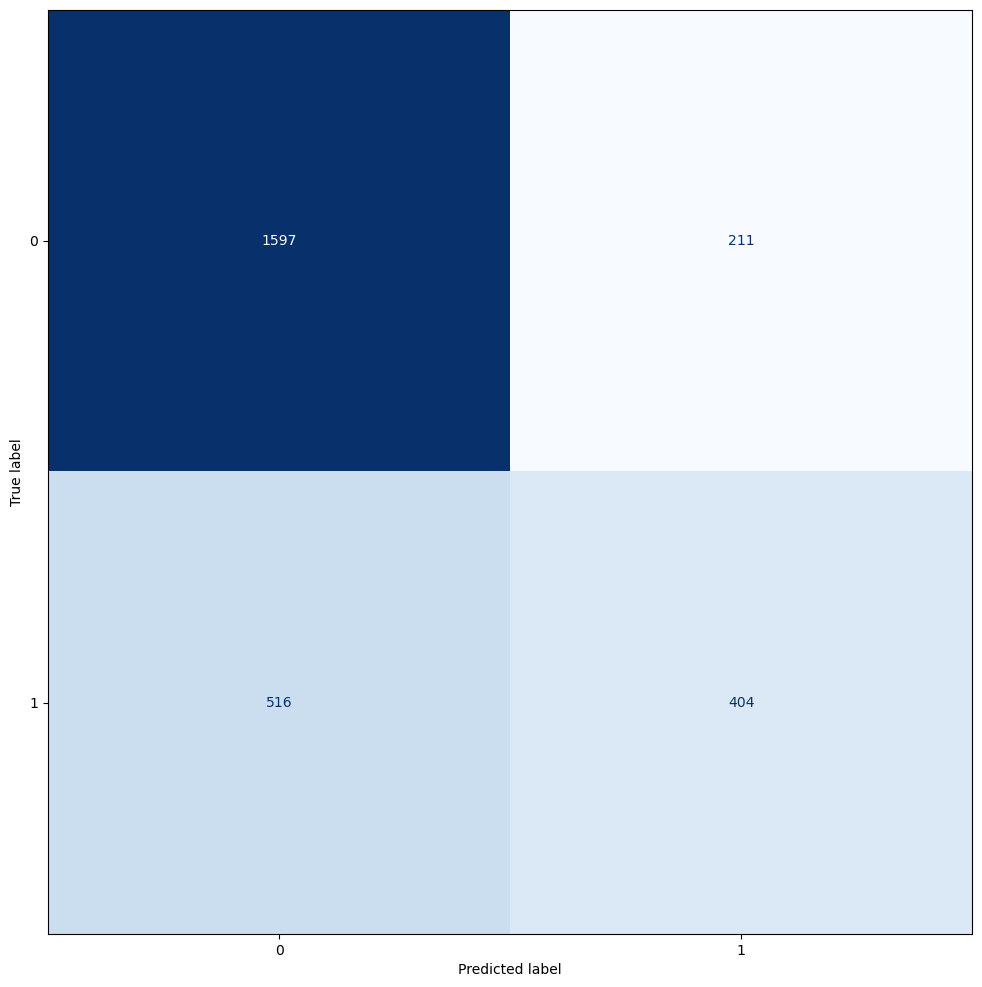

In [94]:
#printing model results

evaluate_model(xgb_classifier, X_test_vec, y_test, 'Testing')

The baseline model demonstrates superior performance on the training set when compared to a naive model that consistently predicts the majority class, resulting in an accuracy score of 60%. 

However, the model's recall score is 43%, indicating that it is unable to identify as many positive sentiments in the dataset as desired. As a result, further exploration of alternative models is warranted to improve the recall score and better capture positive sentiments in the data.

**First Iteration: Complement Naive Bayes Model**

In [99]:
# Initialize and train the Complement Naive Bayes model
cnb = ComplementNB()

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': [0.1, 0.5, 1.0]} 

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(cnb, param_grid, cv=5, scoring='recall', verbose= True)
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameter found by GridSearchCV
print("Best parameters found by GridSearchCV:")
grid_search.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found by GridSearchCV:


{'alpha': 1.0}

Classification Report for Testing Set
Recall Score: 0.7076086956521739
Accuracy: 0.6653225806451613
F-1 score:0.5878103837471783


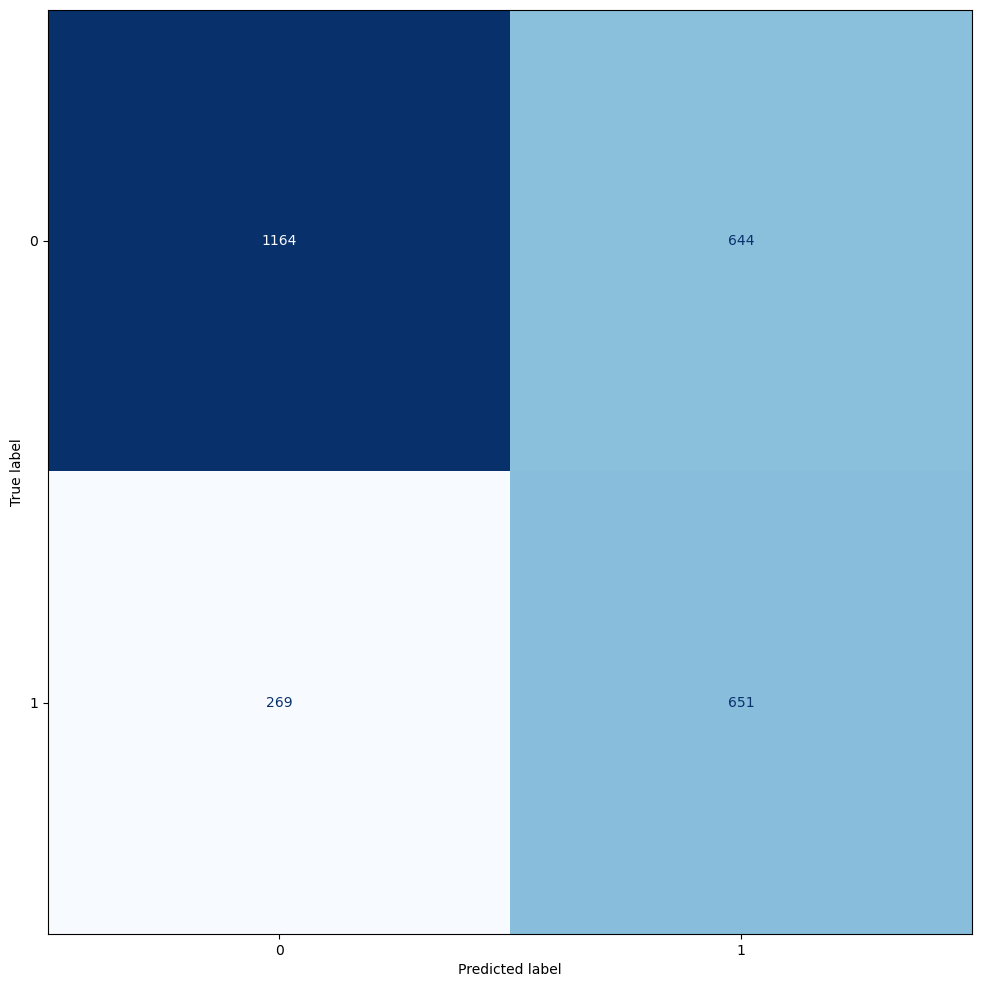

In [100]:
#Printing the best model performance

evaluate_model(grid_search.best_estimator_, X_test_vec, y_test, 'Testing')

An improved recall score of 71% is observed in the tuned compliment-based Naive Bayes model, representing an increase of nearly 28% compared to our baseline model. This improvement suggests that the tuned model is better at identifying positive sentiments in the dataset, indicating its potential effectiveness in capturing positive sentiment nuances.

### Deep Learning

In [101]:
max_length = max([len(tweet.split()) for tweet in X_train])
max_length

18

In [102]:
# Instatiating the Tokenizer
k_tokenizer = keras.preprocessing.text.Tokenizer()

#fit the tokenizer
k_tokenizer.fit_on_texts(X_train)

#tokenizing text
X_train_token = k_tokenizer.texts_to_sequences(X_train)
X_val_token = k_tokenizer.texts_to_sequences(X_test)

In [103]:
#Transforming the x_train and x_test
X_train_processed = keras.preprocessing.sequence.pad_sequences(
    X_train_token, maxlen=max_length, padding='post')
X_val_processed = keras.preprocessing.sequence.pad_sequences(
    X_val_token, maxlen=max_length, padding='post')

In [107]:
#defing the corpus size
corpus_size = len(k_tokenizer.word_index) +1

corpus_size

7225

In [104]:
#creating an embeding matrix
def embed_matrix(glove_, indx, dim):
    corpus_size = len(indx) + 1  
    embedding_matrix = np.zeros((corpus_size, dim))

    with open(glove_, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in indx:
                idx = indx[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:dim]

    return embedding_matrix

In [105]:
#defining the path to glove file
glove = 'glove.6B.50d.txt'
#defining the dimensions
dim = 50
embedding_matrix = embed_matrix(glove, k_tokenizer.word_index, dim)

In [106]:
#instanting the model
model = Sequential()


In [134]:
#adding layers to the model
model.add(layers.Embedding(corpus_size, dim, 
                           weights=[embedding_matrix], 
                           input_length=max_length, 
                           trainable=True))
# flattening these layers down before connecting to dense layer
model.add(layers.Flatten())
# randomly drops out half of hidden layer nodes to regularize model
model.add(Dropout(0.5))
# adds the first hidden layer with ridge regression regularizer to the weights, biases and activation functions
model.add(layers.Dense(350, activation='sigmoid',
                       kernel_regularizer=regularizers.l2(l2=1e-3),
                       bias_regularizer=regularizers.l2(1e-3),
                      activity_regularizer=regularizers.l2(1e-3)))
# randomly drops out half of hidden layer nodes to regularize model
model.add(Dropout(0.5))
# adds the second hidden layer with ridge regression regularizer to the weights, biases and activation functions
model.add(layers.Dense(350, activation='sigmoid',
                       kernel_regularizer=regularizers.l2(l2=1e-3),
                       bias_regularizer=regularizers.l2(1e-3),
                      activity_regularizer=regularizers.l2(1e-3)))
# adds the output layer
model.add(layers.Dense(1, activation='sigmoid'))
# compiles the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 50)            361250    
                                                                 
 flatten (Flatten)           (None, 900)               0         
                                                                 
 dropout (Dropout)           (None, 900)               0         
                                                                 
 dense (Dense)               (None, 350)               315350    
                                                                 
 dropout_1 (Dropout)         (None, 350)               0         
                                                                 
 dense_1 (Dense)             (None, 350)               122850    
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [109]:
#evaluating the model
model.fit(X_train_processed, y_train, epochs=10, batch_size=32, validation_data = (X_val_processed, y_test))

Epoch 1/10
199/199 [==============================] - 13s 43ms/step - loss: 1.0813 - accuracy: 0.6670 - val_loss: 0.8591 - val_accuracy: 0.6635
Epoch 2/10
199/199 [==============================] - 8s 41ms/step - loss: 0.7953 - accuracy: 0.6794 - val_loss: 0.7760 - val_accuracy: 0.6631
Epoch 3/10
199/199 [==============================] - 10s 49ms/step - loss: 0.7288 - accuracy: 0.6978 - val_loss: 0.7335 - val_accuracy: 0.6807
Epoch 4/10
199/199 [==============================] - 11s 53ms/step - loss: 0.6990 - accuracy: 0.7117 - val_loss: 0.7229 - val_accuracy: 0.6946
Epoch 5/10
199/199 [==============================] - 8s 42ms/step - loss: 0.6797 - accuracy: 0.7236 - val_loss: 0.7562 - val_accuracy: 0.6807
Epoch 6/10
199/199 [==============================] - 7s 37ms/step - loss: 0.6595 - accuracy: 0.7434 - val_loss: 0.7269 - val_accuracy: 0.7053
Epoch 7/10
199/199 [==============================] - 10s 49ms/step - loss: 0.6465 - accuracy: 0.7506 - val_loss: 0.7110 - val_accuracy: 0.

## Conclusions

### Best Model for the stakeholder
- The best model based on the metric evaluation is the Deep Learning model. The following benefits will be derived from this model:

1. Competitive Advantage: 

- Adopting advanced deep learning techniques for sentiment analysis gives investment managers a competitive edge in the financial markets. By leveraging cutting-edge technology to extract actionable insights from social media data, managers can identify investment opportunities ahead of competitors, anticipate market movements, and optimize portfolio performance.

2. Real-time Analysis:

- Deep learning models can process large volumes of data rapidly, allowing for real-time analysis of Twitter sentiment. This capability enables the investment manager to stay updated with the latest market sentiments and make timely adjustments to investment strategies.

**Limitations:**

Despite its advantages, deep learning for sentiment analysis also poses some limitations:

1. Data Intensive: Deep learning models typically require large volumes of labeled training data to achieve optimal performance. Acquiring and labeling such data can be time-consuming and resource-intensive, especially in domains like sentiment analysis where ground truth labels may be subjective or context-dependent.

2. Computational Resources: Training deep learning models, particularly neural networks with multiple layers, demands significant computational resources in terms of processing power and memory. This can pose challenges for investment firms with limited computational infrastructure or budget constraints.

In conclusion, while deep learning offers promising capabilities for Twitter sentiment analysis in investment management, investment managers must carefully consider its benefits and limitations when incorporating it into their decision-making processes.


## Recommendations

1. **Feature Engineering:**
   - Explore additional features that could enhance the predictive power of the models, such as sentiment intensity, tweet engagement metrics, or market sentiment indices.


2. **Identify Influencers:**
    - You can identify influential users or accounts that are tweeting about stocks. By analyzing the sentiment of these influential tweets and their reach, you can gauge the potential impact they have on the overall sentiment.


3. **Time Series Analysis:**
    - Analyze the distribution of brand mentions over time. This could reveal trends, such as increased mentions of a brand leading up to a product launch. You could use time series forecasting to predict future brand mentions.


4. **Focus on Specific Events:**
    - Consider incorporating information about specific events that might be influencing sentiment. For instance, if there is a recent news article about a company, you can track the sentiment around that company's stock following the release. This can help isolate the impact of the event on sentiment.

5. Given that Apple has the highest percentage of mentions at 59.02%, it’s evident that there’s a significant interest and positive sentiment towards Apple, making it a potentially lucrative investment opportunity.



**NEXT STEPS**


- Integration into Investment Strategy:

Incorporate the deep learning sentiment analysis model into the investment decision-making process, integrating sentiment-based insights with traditional financial analysis.
Utilize sentiment predictions to inform investment strategies, including portfolio allocation, stock selection, and risk management.

- Continuous Monitoring and Optimization:

Establish a system for real-time monitoring of Twitter sentiment towards the selected stocks, enabling timely adjustments to investment strategies based on evolving sentiment trends.
Continuously optimize the deep learning model by retraining it with updated data and fine-tuning model parameters to maintain its relevance and effectiveness over time.


- Data Acquisition and Preprocessing:

Gather a comprehensive dataset of labeled Twitter data encompassing sentiments towards relevant stocks, including Apple, Google, and Android.
Implement preprocessing steps to clean and standardize the data, including removing noise, handling imbalanced classes, and tokenizing the text.



